In [17]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [20]:
# Load dataset
df = pd.read_csv('dataset.csv', encoding='ISO-8859-1')

In [ ]:
# Handle missing values
df = df.dropna(subset=['Title', 'Description'])  # Remove rows with missing text
df['Description'] = df['Description'].fillna('')  # Fill remaining NaN with empty strings

In [22]:
# Preprocessing functions
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_links(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [ ]:
def clean_text(text):
    if pd.isna(text):
        return ''
    text = remove_emojis(text)
    text = remove_links(text)
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text.lower()

In [24]:
# Apply preprocessing
df['clean_title'] = df['Title'].apply(clean_text)
df['clean_description'] = df['Description'].apply(clean_text)

In [25]:
# Remove 'Nonprofits & Activism' category
df = df[df['Category'] != 'Nonprofits & Activism']

In [26]:
# Print category distribution values
category_counts = df['Category'].value_counts()
print("Category Distribution:")
print(category_counts)

Category Distribution:
Category
News & Politics         3511
Science & Technology    3061
Music                   2006
Howto & Style           1930
Comedy                  1416
Sports                  1221
Autos & Vehicles        1168
Education                977
Entertainment            747
Gaming                   622
People & Blogs           529
Pets & Animals           502
Travel & Events          405
Film & Animation         312
Name: count, dtype: int64


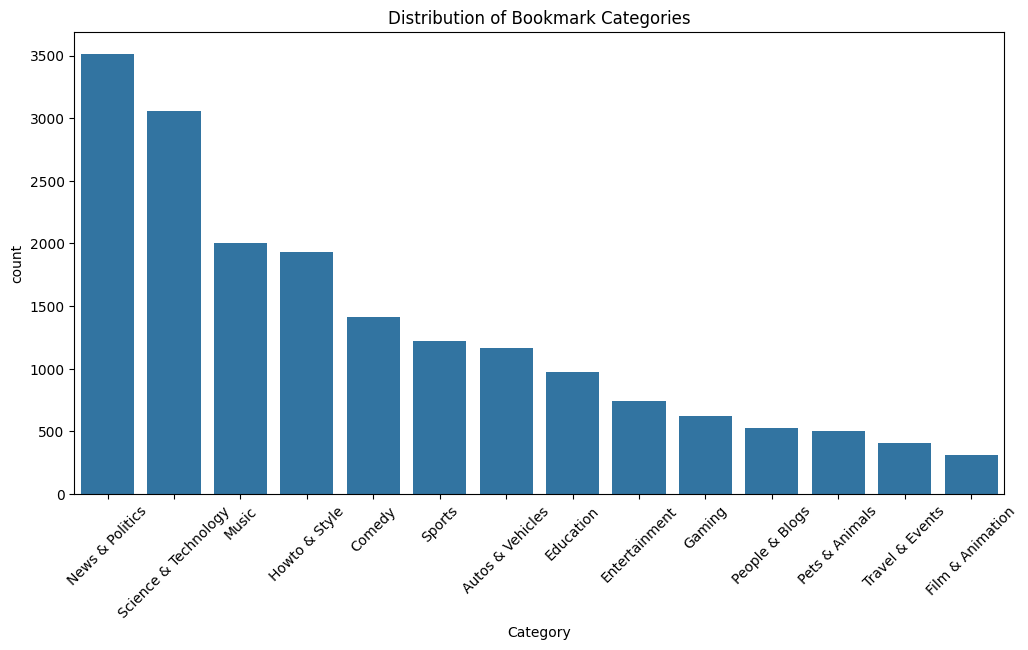

In [10]:
# Visualization 1: Category Distribution
plt.figure(figsize=(12,6))
category_plot = sns.countplot(
    x='Category', 
    data=df,
    order=df['Category'].value_counts().index
)
plt.title('Distribution of Bookmark Categories')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Define category mapping dictionary
category_mapping = {
    # Existing categories to keep
    'Sports': 'Sports',
    'Howto & Style': 'Howto & Style',
    'Autos & Vehicles': 'Autos & Vehicles',
    'Travel & Events': 'Travel & Adventures',
    
    # Combined categories
    'Science & Technology': 'Science & Learning',
    'Education': 'Science & Learning',
    'Music': 'Entertainment & Media',
    'Comedy': 'Entertainment & Media',
    'Entertainment': 'Entertainment & Media',
    'Film & Animation': 'Entertainment & Media',
    'Gaming': 'Entertainment & Media',
    'People & Blogs': 'Lifestyle & Pets',
    'Pets & Animals': 'Lifestyle & Pets',
    'News & Politics': 'News & Politics'
}

# Apply category transformation
df['new_category'] = df['Category'].replace(category_mapping)

# Verify transformations
print("Original categories:\n", df['Category'].value_counts())
print("\nNew categories:\n", df['new_category'].value_counts())

Original categories:
 Category
News & Politics         3511
Science & Technology    3061
Music                   2006
Howto & Style           1930
Comedy                  1416
Sports                  1221
Autos & Vehicles        1168
Education                977
Entertainment            747
Gaming                   622
People & Blogs           529
Pets & Animals           502
Travel & Events          405
Film & Animation         312
Name: count, dtype: int64

New categories:
 new_category
Entertainment & Media    5103
Science & Learning       4038
News & Politics          3511
Howto & Style            1930
Sports                   1221
Autos & Vehicles         1168
Lifestyle & Pets         1031
Travel & Adventures       405
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_43216\2802451063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


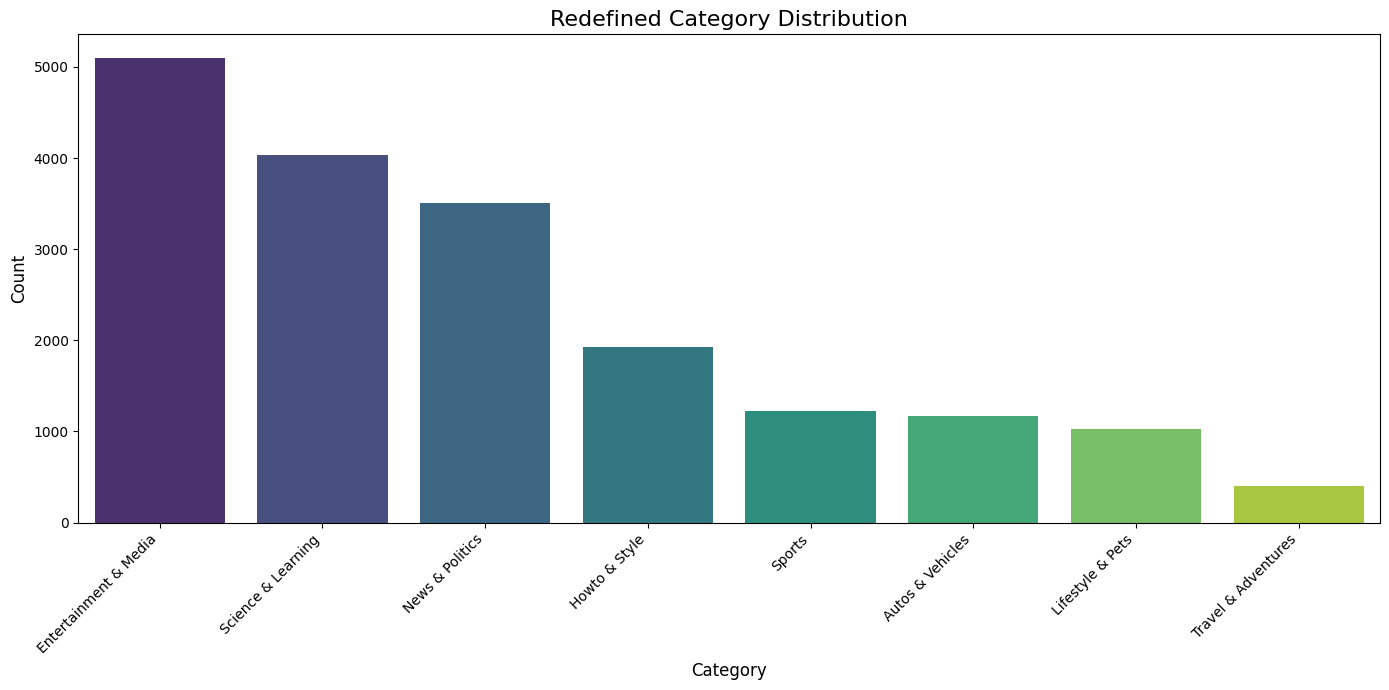

In [29]:
# Visualize updated distribution
plt.figure(figsize=(14,7))
sns.countplot(
    x='new_category',
    data=df,
    order=df['new_category'].value_counts().index,
    palette='viridis'
)
plt.title('Redefined Category Distribution', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

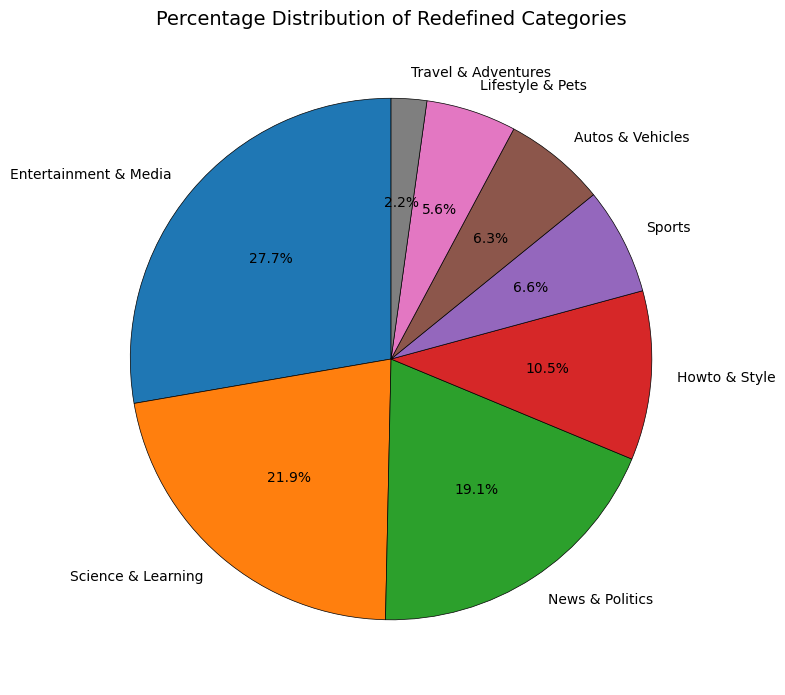

In [13]:
# Optional: Pie chart for percentage distribution
plt.figure(figsize=(8,8))
df['new_category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
    textprops={'fontsize': 10}
)
plt.title('Percentage Distribution of Redefined Categories', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

In [30]:
df.head()

,Title,Description,Category,clean_title,clean_description,new_category
0,Surviving on one meal a day: Sudanese refugees...,Many Sudanese refugees are surviving on one me...,News & Politics,surviving on one meal a day sudanese refugees ...,many sudanese refugees are surviving on one me...,News & Politics
1,"Crowder, Dylan Scott - Somebody Prayed (Visual...",Official Visualizer For ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï...,Music,crowder dylan scott somebody prayed visualizer,official visualizer for ï ½ï ½ï ½ï ½ï ½ï ½ï ½ï...,Entertainment & Media
2,How hard is it to break a leg with a leglock? ...,Lex Fridman Podcast full episode: https://www....,Science & Technology,how hard is it to break a leg with a leglock j...,lex fridman podcast full episode please suppor...,Science & Learning
3,This Simple Exercise Will Reboot Your Brain in...,Pressing certain points on your body can do mi...,Entertainment,this simple exercise will reboot your brain in...,pressing certain points on your body can do mi...,Entertainment & Media
4,BBC sent around 41 Million Warning Letters to ...,BBC sent around 41 Million Warning Letters to ...,News & Politics,bbc sent around 41 million warning letters to ...,bbc sent around 41 million warning letters to ...,News & Politics


In [33]:
import pandas as pd
import re

def clean_garbled_text(text):
    if pd.isna(text):
        return text
    # Remove mojibake/weird sequences
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII
    text = re.sub(r'�+', ' ', text)             # Remove replacement chars
    text = re.sub(r'\s+', ' ', text).strip()    # Normalize whitespace
    return text

# Load data with explicit encoding (try these if needed)
for encoding in ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']:
    try:
        df = df
        break
    except UnicodeDecodeError:
        continue

# Apply cleaning to text columns
df['clean_title'] = df['clean_title'].apply(clean_garbled_text)
df['clean_description'] = df['clean_description'].apply(clean_garbled_text)

In [34]:
df.head()

,Title,Description,Category,clean_title,clean_description,new_category
0,Surviving on one meal a day: Sudanese refugees...,Many Sudanese refugees are surviving on one me...,News & Politics,surviving on one meal a day sudanese refugees ...,many sudanese refugees are surviving on one me...,News & Politics
1,"Crowder, Dylan Scott - Somebody Prayed (Visual...",Official Visualizer For Somebody Prayed by Cro...,Music,crowder dylan scott somebody prayed visualizer,official visualizer for somebody prayed by cro...,Entertainment & Media
2,How hard is it to break a leg with a leglock? ...,Lex Fridman Podcast full episode: https://www....,Science & Technology,how hard is it to break a leg with a leglock j...,lex fridman podcast full episode please suppor...,Science & Learning
3,This Simple Exercise Will Reboot Your Brain in...,Pressing certain points on your body can do mi...,Entertainment,this simple exercise will reboot your brain in...,pressing certain points on your body can do mi...,Entertainment & Media
4,BBC sent around 41 Million Warning Letters to ...,BBC sent around 41 Million Warning Letters to ...,News & Politics,bbc sent around 41 million warning letters to ...,bbc sent around 41 million warning letters to ...,News & Politics


1/8 Starting data preprocessing...


100%|██████████| 18407/18407 [00:00<00:00, 19897.68it/s]


✅ Text combination and preprocessing completed

2/8 Loaded 13 custom stop words

3/8 Initializing TF-IDF vectorizer...
4/8 Fitting TF-IDF model to corpus...
✅ TF-IDF model fitted with 10000 features

5/8 Generating tags (this may take some time)...


100%|██████████| 18407/18407 [28:04<00:00, 10.93it/s] 


✅ Tags generated for 18407 entries

6/8 Post-processing tags...


100%|██████████| 18407/18407 [00:00<00:00, 136017.86it/s]


✅ Final tag cleaning completed

7/8 Generating visualizations...


C:\Users\User\AppData\Local\Temp\ipykernel_43216\2384348848.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[count for tag, count in tag_counts],


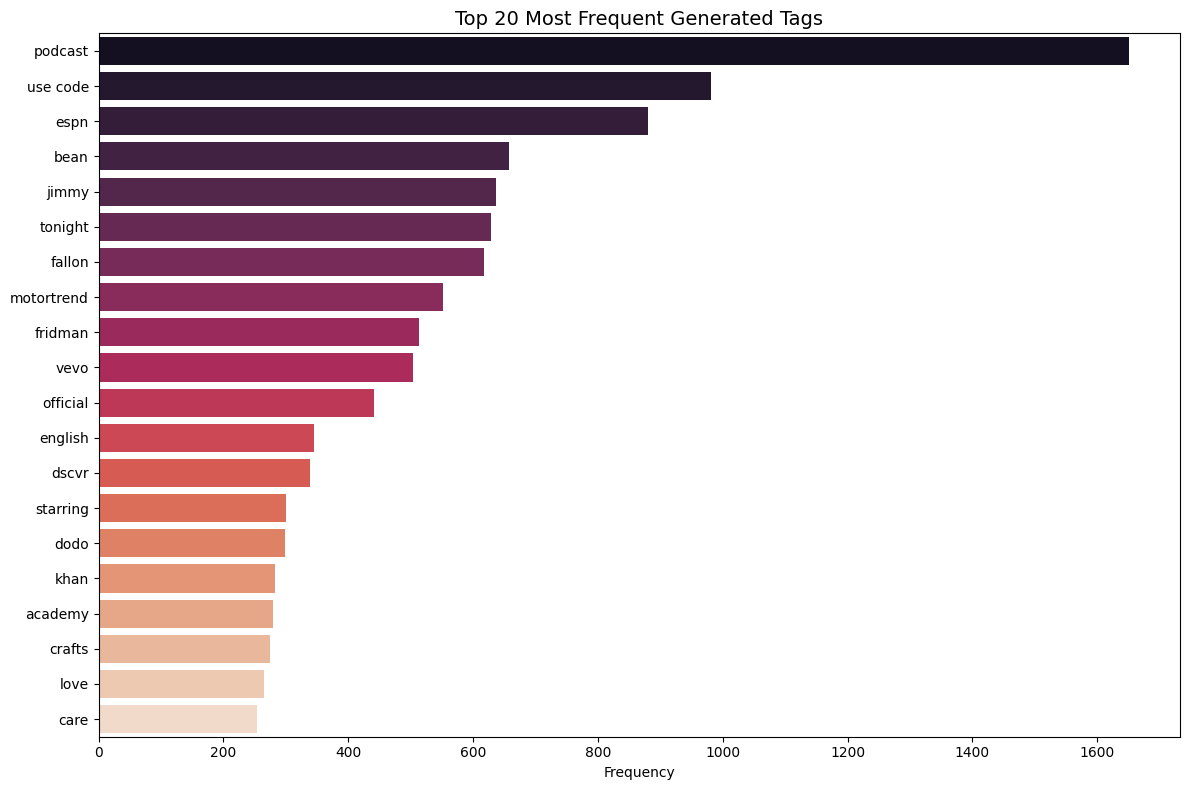

✅ Visualization rendered

8/8 Process complete!
Final Statistics:
- Total entries processed: 18,407
- Average tags per entry: 4.4
- Unique tags generated: 4,488
- Most common tag: 'podcast' (1650 occurrences)


In [35]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Enable progress tracking for pandas apply
tqdm.pandas()

# Preprocessing function with status messages
def preprocess_text(text):
    """Clean text with step-by-step processing"""
    original = str(text)
    if len(original) == 0:
        return ''
    
    # Track processing steps
    steps = []
    
    # Remove non-ASCII characters
    cleaned = re.sub(r'[^\x00-\x7F]+', ' ', original)
    if cleaned != original:
        steps.append("Removed non-ASCII characters")
    
    # Remove punctuation
    cleaned = re.sub(r'[^\w\s]', '', cleaned)
    steps.append("Removed punctuation")
    
    # Remove numbers
    cleaned = re.sub(r'\d+', '', cleaned)
    steps.append("Removed numbers")
    
    # Lowercase and strip
    final = cleaned.lower().strip()
    if final != cleaned:
        steps.append("Lowercased and stripped whitespace")
    
    return final

print("1/8 Starting data preprocessing...")
# Combine title and description with cleaning
df['combined_text'] = (df['clean_title'] + ' ' + df['clean_description']).progress_apply(preprocess_text)
print("✅ Text combination and preprocessing completed\n")

# Custom stop words for YouTube content
custom_stop_words = {'video', 'watch', 'channel', 'subscribe', 'like', 'comment', 
                    'click', 'http', 'https', 'com', 'www', 'youtube', 'videos'}
print(f"2/8 Loaded {len(custom_stop_words)} custom stop words\n")

print("3/8 Initializing TF-IDF vectorizer...")
tfidf = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 3),
    max_features=10000,
    min_df=2,
    max_df=0.95
)

print("4/8 Fitting TF-IDF model to corpus...")
tfidf_matrix = tfidf.fit_transform(df['combined_text'])
print(f"✅ TF-IDF model fitted with {tfidf_matrix.shape[1]} features\n")

def get_top_tags(row, top_n=5):
    """Enhanced tag generation with progress tracking"""
    try:
        # Get TF-IDF scores
        feature_index = tfidf_matrix[row.name].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[row.name, x] for x in feature_index])
        
        # Sort scores
        sorted_items = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
        
        # Process candidates
        candidates = [(tfidf.get_feature_names_out()[i], score) 
                     for i, score in sorted_items[:top_n*2]]
        
        # Filter and deduplicate
        unique_tags = []
        seen_words = set()
        for tag, score in candidates:
            # Clean tag
            words = [word for word in tag.split() 
                    if word not in custom_stop_words and len(word) > 2]
            simple_tag = ' '.join(words)
            
            # Check uniqueness
            if simple_tag and not any(word in seen_words for word in simple_tag.split()):
                unique_tags.append(simple_tag)
                seen_words.update(simple_tag.split())
            
            if len(unique_tags) >= top_n:
                break
                
        return unique_tags[:top_n]
    except Exception as e:
        return []

print("5/8 Generating tags (this may take some time)...")
df['Tags'] = df.progress_apply(get_top_tags, axis=1)
print(f"✅ Tags generated for {len(df)} entries\n")

print("6/8 Post-processing tags...")
def clean_tags(tags):
    return [tag for tag in tags 
           if not any(word in custom_stop_words for word in tag.split())
           and len(tag) > 3][:5]

df['Tags'] = df['Tags'].progress_apply(clean_tags)
print("✅ Final tag cleaning completed\n")

# Visualization
print("7/8 Generating visualizations...")
all_tags = [tag for sublist in df['Tags'] for tag in sublist]
tag_counts = Counter(all_tags).most_common(20)

plt.figure(figsize=(12,8))
sns.barplot(x=[count for tag, count in tag_counts], 
            y=[tag for tag, count in tag_counts], palette='rocket')
plt.title('Top 20 Most Frequent Generated Tags', fontsize=14)
plt.xlabel('Frequency')
plt.tight_layout()
plt.show()
print("✅ Visualization rendered\n")

print("8/8 Process complete!")
print("="*40)
print("Final Statistics:")
print(f"- Total entries processed: {len(df):,}")
print(f"- Average tags per entry: {df['Tags'].apply(len).mean():.1f}")
print(f"- Unique tags generated: {len(set(all_tags)):,}")
print(f"- Most common tag: '{tag_counts[0][0]}' ({tag_counts[0][1]} occurrences)")

In [ ]:
df.head()

,Title,Description,Category,clean_title,clean_description,new_category,combined_text,Tags
0,Surviving on one meal a day: Sudanese refugees...,Many Sudanese refugees are surviving on one me...,News & Politics,surviving on one meal a day sudanese refugees ...,many sudanese refugees are surviving on one me...,News & Politics,surviving on one meal a day sudanese refugees ...,"[refugees, meal, sudan, particularly]"
1,"Crowder, Dylan Scott - Somebody Prayed (Visual...",Official Visualizer For Somebody Prayed by Cro...,Music,crowder dylan scott somebody prayed visualizer,official visualizer for somebody prayed by cro...,Entertainment & Media,crowder dylan scott somebody prayed visualizer...,"[somebody, seen, come, faith, scott]"
2,How hard is it to break a leg with a leglock? ...,Lex Fridman Podcast full episode: https://www....,Science & Technology,how hard is it to break a leg with a leglock j...,lex fridman podcast full episode please suppor...,Science & Learning,how hard is it to break a leg with a leglock j...,"[podcast, john, credit, judo]"
3,This Simple Exercise Will Reboot Your Brain in...,Pressing certain points on your body can do mi...,Entertainment,this simple exercise will reboot your brain in...,pressing certain points on your body can do mi...,Entertainment & Media,this simple exercise will reboot your brain in...,"[exercise, brain, seconds, points, hands]"
4,BBC sent around 41 Million Warning Letters to ...,BBC sent around 41 Million Warning Letters to ...,News & Politics,bbc sent around 41 million warning letters to ...,bbc sent around 41 million warning letters to ...,News & Politics,bbc sent around million warning letters to th...,"[warning, letters, million, household]"


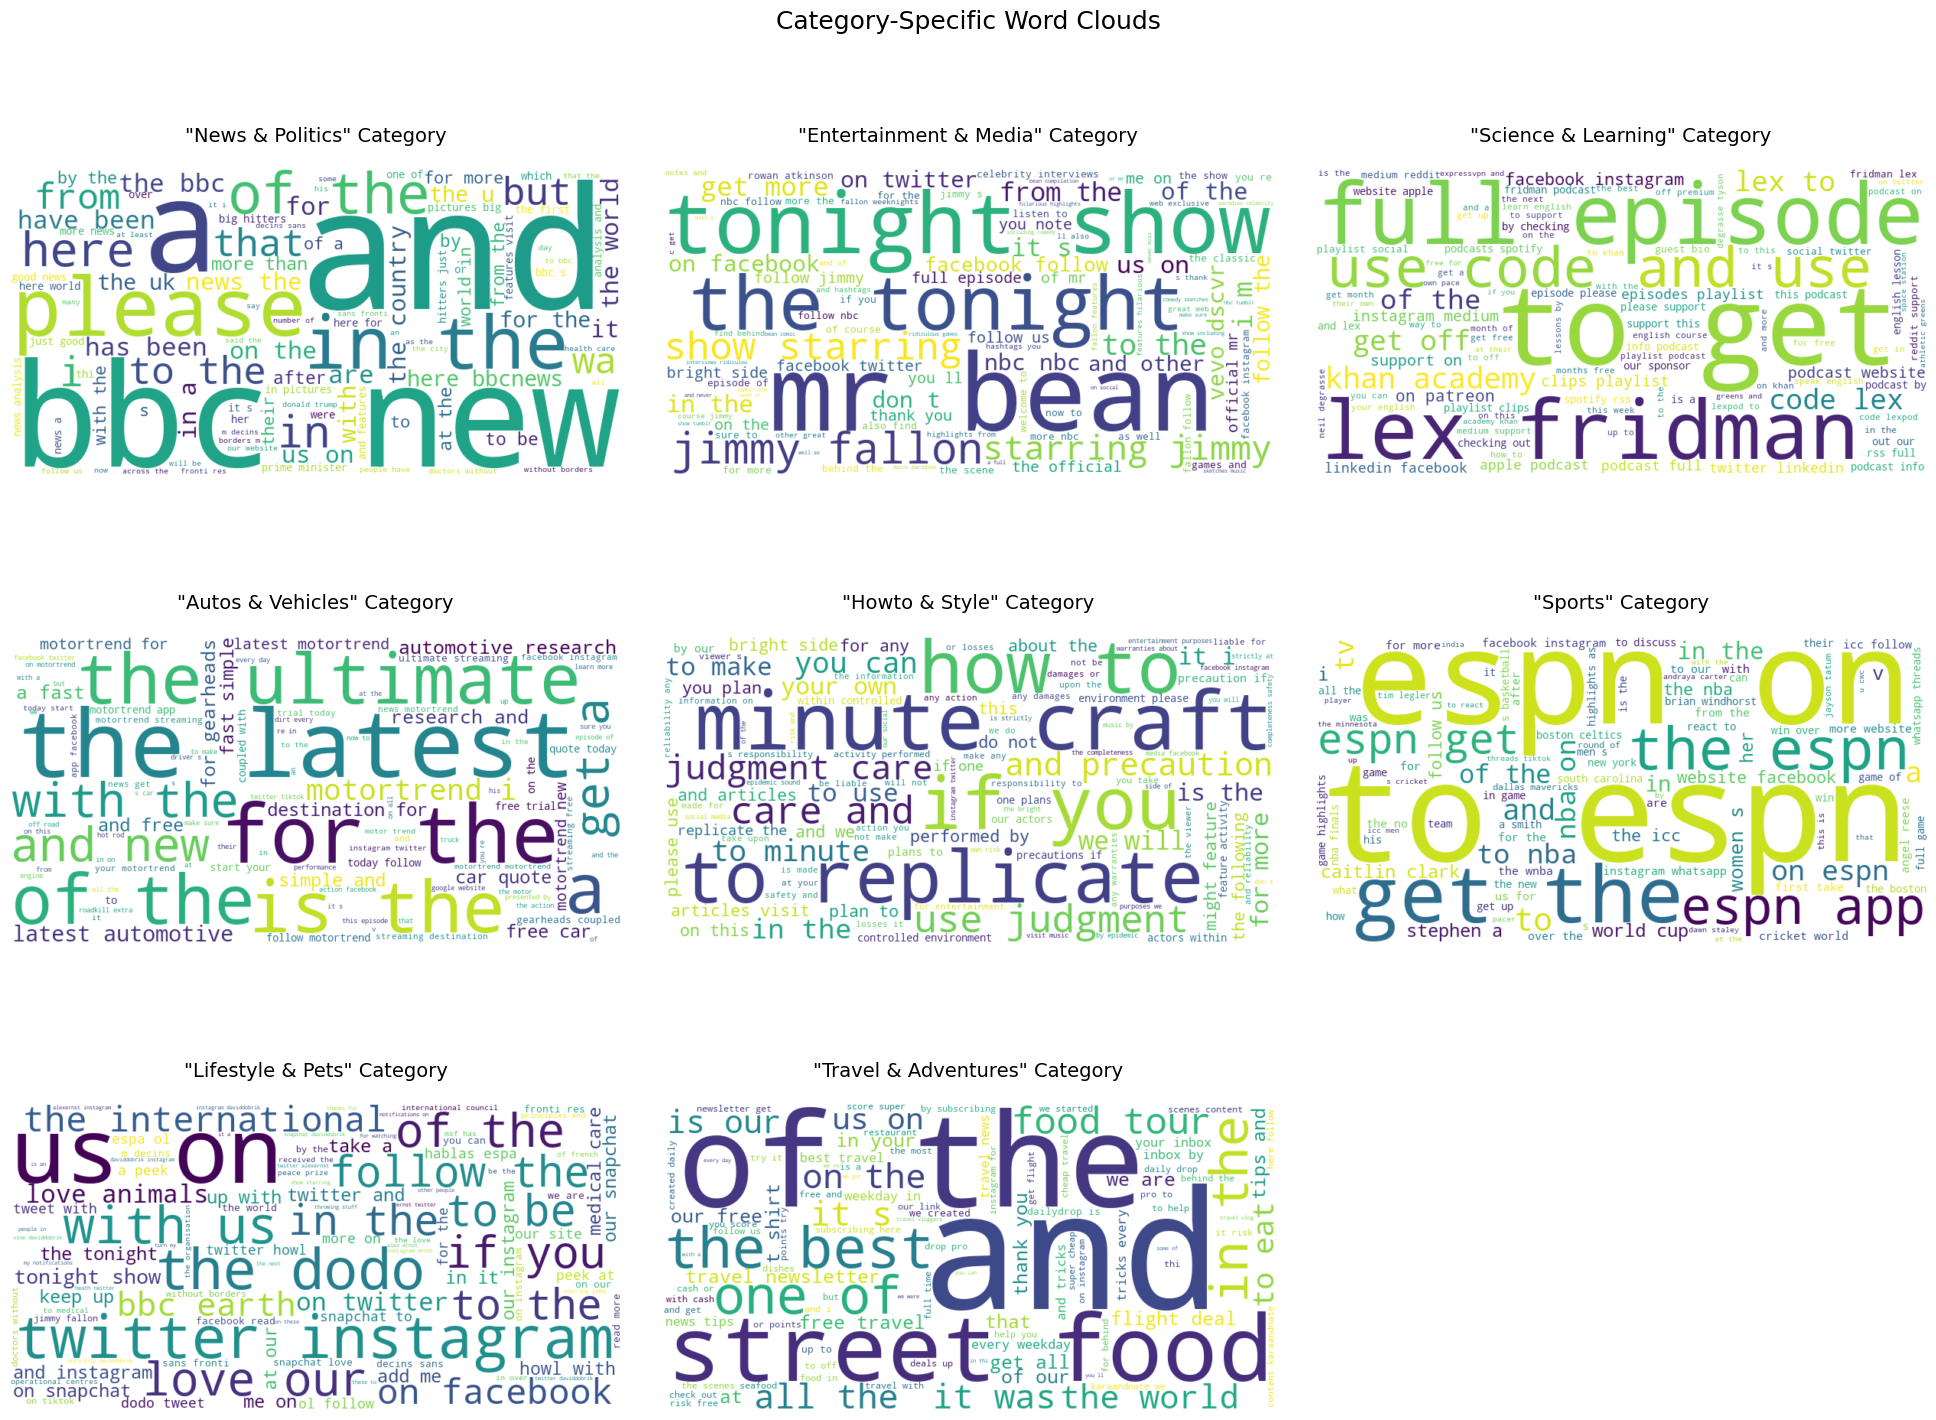

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get list of categories
categories = df['new_category'].unique().tolist()

# Create subplot grid
n_cols = 3
n_rows = (len(categories) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.flatten()

# Generate word cloud for each category
for idx, category in enumerate(categories):
    # Combine text for the category
    category_text = ' '.join(df[df['new_category'] == category]['combined_text'])
    
    # Generate word cloud with CORRECTED parameter name
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=custom_stop_words,  # Changed from stop_words to stopwords
        collocations=True,
        colormap='viridis',
        max_words=100
    ).generate(category_text)
    
    # Plot settings
    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'"{category}" Category', fontsize=14, pad=20)
    axes[idx].axis('off')

# Hide empty subplots
for idx in range(len(categories), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout(pad=3.0)
plt.suptitle('Category-Specific Word Clouds', y=1.02, fontsize=18)
plt.show()

In [39]:
import pandas as pd
import csv

# Save DataFrame with proper formatting
df.to_csv(
    'processed_bookmarks.csv', 
    index=False,             # Don't save row numbers
    encoding='utf-8-sig',    # For better special character handling
    quoting=csv.QUOTE_ALL    # Quote all fields to preserve commas in text
)

print("✅ File saved as 'processed_bookmarks.csv'")
print(f"- Total records: {len(df):,}")
print(f"- Columns saved: {list(df.columns)}")

✅ File saved as 'processed_bookmarks.csv'
- Total records: 18,407
- Columns saved: ['Title', 'Description', 'Category', 'clean_title', 'clean_description', 'new_category', 'combined_text', 'Tags']
